In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option('display.max_rows', 100)

In [2]:
df=pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns='User ID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Data Wangling & Visualization

#### Target "Purchased"

In [9]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Purchased', ylabel='count'>

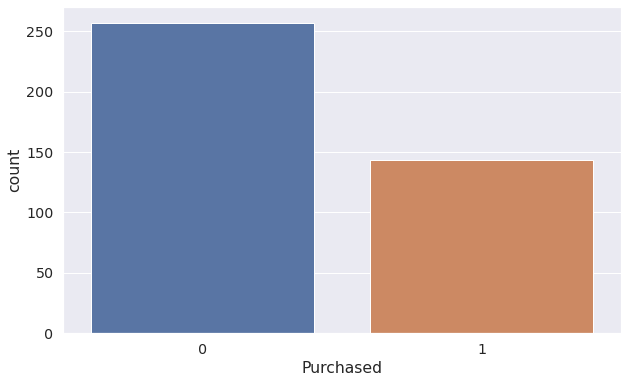

In [10]:
sns.countplot(df['Purchased'])

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

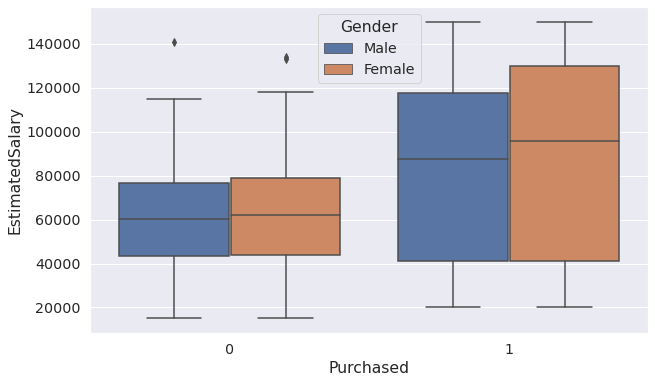

In [11]:
sns.boxplot(data=df,x='Purchased',y='EstimatedSalary',hue='Gender')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

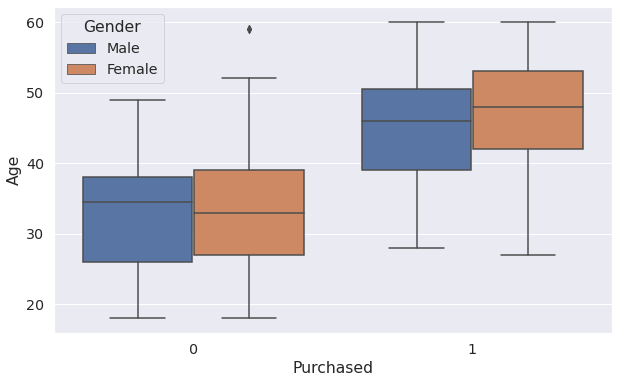

In [12]:
sns.boxplot(data=df,x='Purchased',y='Age',hue='Gender')

### Features

1. Gender

In [13]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

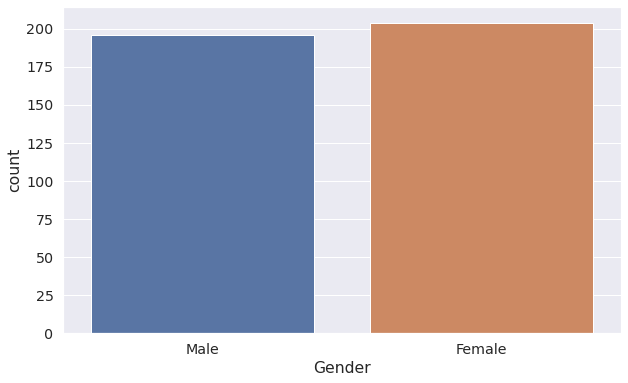

In [14]:
sns.countplot(data=df,x='Gender')

2. EstimatedSalary
3. Age

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


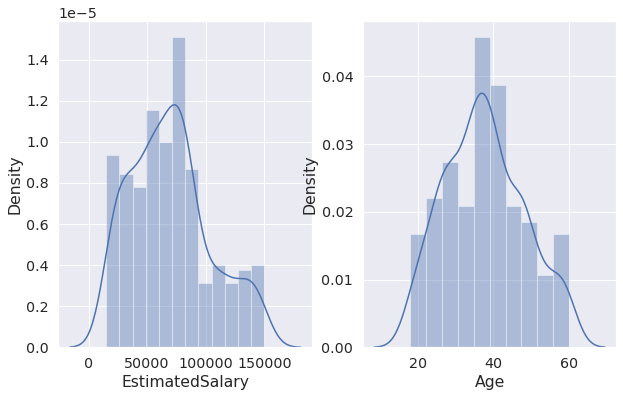

In [16]:
cols=['EstimatedSalary','Age']
fig,ax=plt.subplots(1,2,figsize=(10,6))
for j,i in enumerate(cols):
    sns.distplot(df[i],ax=ax[j])
    

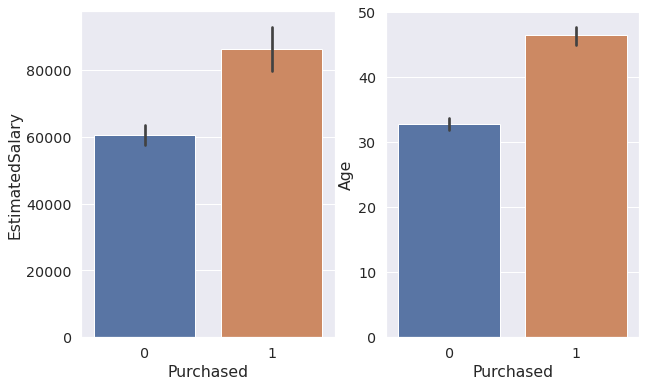

In [17]:
cols=['EstimatedSalary','Age']
fig,ax=plt.subplots(1,2,figsize=(10,6))
for j,i in enumerate(cols):
    sns.barplot(data=df,x='Purchased',y=i,ax=ax[j])
    

###  Preprocessing @ ML

1. encoding

In [18]:
df=pd.get_dummies(columns=['Gender'],data=df,drop_first=True)

In [19]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


2. spliting data

In [20]:
from sklearn.model_selection import train_test_split

y=df.Purchased
x=df.drop(columns='Purchased',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=22,shuffle=True,stratify=df['Purchased'])

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((340, 3), (60, 3), (340,), (60,))

In [22]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


3. Standrization

In [23]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(x_train[cols])
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

### Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [25]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=70),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes": GaussianNB()
}

In [26]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8470588235294118
Testing Accuracy: 0.8833333333333333
Testing Confusion Matrix: 
[[37  2]
 [ 5 16]]
Testing Recall: 0.7619047619047619
Testing Precesion: 0.8888888888888888
Testing F-1: 0.8205128205128205
Testing F-Beta: 0.8602150537634409
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9147058823529411
Testing Accuracy: 0.9166666666666666
Testing Confusion Matrix: 
[[35  4]
 [ 1 20]]
Testing Recall: 0.9523809523809523
Testing Precesion: 0.8333333333333334
Testing F-1: 0.888888888888889
Testing F-Beta: 0.8547008547008548
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.6794117647058824
Testing Accuracy: 0.6833333333333333
Testing Confusion Matrix: 
[[28 11]
 [ 8 13]]
Testing Recall: 0.6190476190476191
Testing Precesion: 0.5416666666666666
Testing F-1: 0.5777777777777778
Testing F-Beta: 0.5555555555555555
------------------------------
Training Model DT 
--

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.9941176470588236
Testing Accuracy: 0.9
Testing Confusion Matrix: 
[[35  4]
 [ 2 19]]
Testing Recall: 0.9047619047619048
Testing Precesion: 0.8260869565217391
Testing F-1: 0.8636363636363636
Testing F-Beta: 0.84070796460177
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.8970588235294118
Testing Accuracy: 0.8833333333333333
Testing Confusion Matrix: 
[[35  4]
 [ 3 18]]
Testing Recall: 0.8571428571428571
Testing Precesion: 0.8181818181818182
Testing F-1: 0.8372093023255814
Testing F-Beta: 0.8256880733944955
------------------------------


- Apply Imbalanced 

In [27]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((436, 3), (60, 3), (436,), (60,))

In [29]:
x_train

,Age,EstimatedSalary,Gender_Male
0,-0.249703,0.054949,0
1,-1.293154,-1.116466,0
2,0.414312,0.175094,0
3,-1.008577,-0.335523,0
4,2.026918,1.827088,1
...,...,...,...
431,-0.534281,1.420825,1
432,0.609148,2.084450,0
433,0.888608,-0.594113,0
434,-0.555945,1.503735,0


In [30]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8463302752293578
Testing Accuracy: 0.8666666666666667
Testing Confusion Matrix: 
[[34  5]
 [ 3 18]]
Testing Recall: 0.8571428571428571
Testing Precesion: 0.782608695652174
Testing F-1: 0.8181818181818182
Testing F-Beta: 0.7964601769911503
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9220183486238532
Testing Accuracy: 0.9
Testing Confusion Matrix: 
[[34  5]
 [ 1 20]]
Testing Recall: 0.9523809523809523
Testing Precesion: 0.8
Testing F-1: 0.8695652173913043
Testing F-Beta: 0.8264462809917356
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.6811926605504587
Testing Accuracy: 0.65
Testing Confusion Matrix: 
[[24 15]
 [ 6 15]]
Testing Recall: 0.7142857142857143
Testing Precesion: 0.5
Testing F-1: 0.588235294117647
Testing F-Beta: 0.5319148936170213
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.8166

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9954128440366973
Testing Accuracy: 0.9166666666666666
Testing Confusion Matrix: 
[[35  4]
 [ 1 20]]
Testing Recall: 0.9523809523809523
Testing Precesion: 0.8333333333333334
Testing F-1: 0.888888888888889
Testing F-Beta: 0.8547008547008548
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.8944954128440367
Testing Accuracy: 0.9
Testing Confusion Matrix: 
[[34  5]
 [ 1 20]]
Testing Recall: 0.9523809523809523
Testing Precesion: 0.8
Testing F-1: 0.8695652173913043
Testing F-Beta: 0.8264462809917356
------------------------------


In [31]:
model=XGBClassifier(n_estimators = 70, max_depth = 10,min_samples_split =3,learning_rate=.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

[13:05:35] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:05:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9166666666666666

### The best accurcy is  91.6%